# Perceptron

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Linear Classification Problem

Let's start by generating a simple linear classification problem.  That is, a problem in which the optimal decision boundary is known to be linear.  We're also generating a problem in which the samples are perfectly linearly separable.  This is the exception rather than the rule.

In [3]:
data = np.random.random_sample((100,2))
labels = (data[:,0]*0.7+data[:,1]*0.4>0.5)

44 56


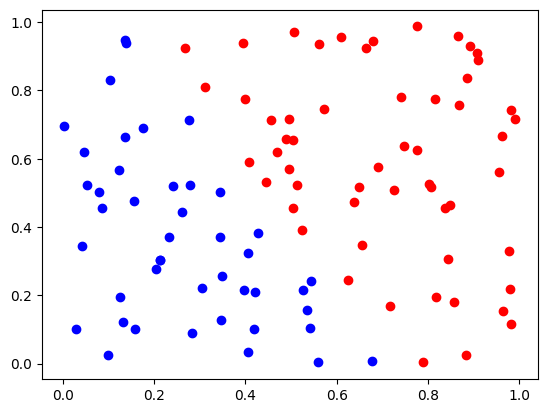

In [4]:
d0 = data[labels==False]
d1 = data[labels]
plt.plot(d0[:,0],d0[:,1],"bo")
plt.plot(d1[:,0],d1[:,1],"ro")
print(len(d0),len(d1))

We can visually read off the equation for the decision boundary.  It should run from (0.15,1.0) to about (0.7,0.0).



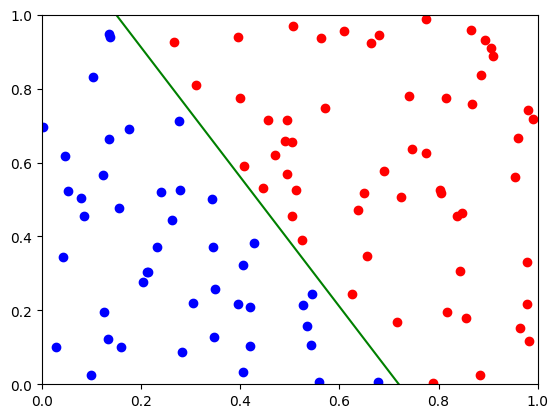

In [5]:
d0 = data[labels==False]
d1 = data[labels]
plt.xlim((0,1))
plt.ylim((0,1))
plt.plot(d0[:,0],d0[:,1],"bo")
plt.plot(d1[:,0],d1[:,1],"ro")
plt.plot([0.15,0.72],[1.0,0.0],"g") # guess

Note that these decision boundaries are linear, by construction.  
How do we find these decision boundaries automatically?

(augmented vectors)

To simplify computations, we would like to use homogeneous coordinates.

A linear decision boundary is given by a formula of the form:

$$a_1 x_1 + ... + a_n x_n = d$$

We can write this as

$$a \cdot x = d $$

With this, we classify as class 0:

$$a \cdot x \leq d$$

and as class 1:

$$a \cdot x \gt d$$


(augmented vectors)

However, it turns out to be inconvenient to have the $d$ in all our equations; we therefore turn this inhomogeneous problem into a homogeneous one by transforming the vectors.

$$ x \rightarrow (1,x) $$

$$ a \rightarrow (-d,x) $$

Now we can write for our decision problem:

$$ a \cdot x \leq 0$$

and

$$a \cdot x \gt 0$$

Therefore, for any inhomogeneous linear decision problem, we can construct an equivalent homogeneous one by simply adding a column of 1's to the data vector

## The Perceptron Learning Algorithm

(sample correction)

We want $a \cdot x \gt 1$ for all samples in class 1.  Now, assume that this isn't working for some sample $x$, $a \cdot x \leq 0$ even though it should be $\gt 0$.  How do we fix that?

Actuall, the solution is fairly simple:

- When $a \cdot x \leq 0$ when it should be $\gt 0$, we add "a little bit of $x$" to $a$.  
- That is, we update $a \rightarrow a + \epsilon x$.  

Then, next time, $(a + \epsilon x) \cdot x = a \cdot x + \epsilon ||x||^2 > a \cdot x$.

- For the other case, we subtract a little bit of $x$.

(flipping class 0 to class 1)

Notice that the two cases are symmetrical.

Instead of considering two classes, we can simplify the problem further by flipping the sign of $x$ for all the samples in class $0$.  

Then, we require for all samples in the transformed problem that $a \cdot x \gt 0$.

(Remember that we have also augmented the data vector).

(perceptron learning algorithm)

So, the perceptron learning algorithm is:

- given input samples $\\{x_1,...,x_N\\} \subseteq R^n$ and corresponding classifications $\\{c_1,...,c_N\\} \subseteq \\{0,1\\}$
- replace all the $x_i$ with augmented vectors $x_i \rightarrow (1,x_i)$
- for every sample for which $c_i=0$, negate the corresponding $x_i$, that is $x_i \rightarrow -x_i$
- pick a random starting vector $a$
- repeatedly iterate through the training samples $x_i$
  - if $a \cdot x_i > 0$ then continue
  - otherwise update $a$ according to $a \rightarrow a + \epsilon x_i$
  - stop if there are no more updates

Actually, it turns out that we can just use $\epsilon = 1$.

In [6]:
augmented = np.concatenate([np.ones((100,1)),data],axis=1)
flipped = augmented.copy()
flipped[labels==False] = -flipped[labels==False]

In [7]:
a = np.random.random_sample((3))

for epoch in range(100):
    nchanged = 0
    for i in range(len(flipped)):
        if np.dot(a, flipped[i]) > 0:
            continue
        a += flipped[i]
        nchanged += 1
    if nchanged == 0:
        break

d,a0,a1 = a
print(d, a0, a1)

-3.375073622580742 4.527281114232696 2.627011651839645


The linear equation is now:

$$a_0 x + a_1 y + d = 0$$

For $x=0$:

$$y = -\frac{d}{a_1}$$

For $y=0$:

$$x = -\frac{d}{a_0}$$

44 56


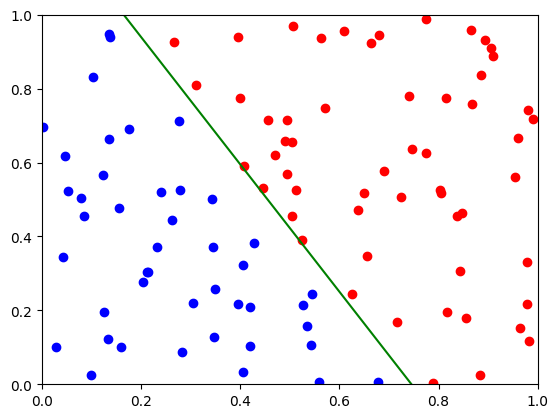

In [8]:
d0 = data[labels==False]
d1 = data[labels]
plt.xlim((0,1))
plt.ylim((0,1))
plt.plot(d0[:,0],d0[:,1],"bo")
plt.plot(d1[:,0],d1[:,1],"ro")
plt.plot([0,-d/a0],[-d/a1,0],"g")
print(len(d0),len(d1))

That has worked rather well, but it leaves open a number of questions:

- Is the algorithm guaranteed to stop?
- How do we deal with more than two classes?
- What is the error rate?
- How does it relate to the c.c.d. $p(x|c)$?
- What happens when the data isn't linearly separable?
- It's fairly easy to show that the algorithm converges if the data is linearly separable. 

## The Perceptron Criterion Function

(criterion functions)

In the perceptron learning algorithm, we made a change to the weight vector every time a sample was misclassified.

In essence, we have been trying to _minimize the number of misclassified samples_

We call the number of misclassified samples $J(w) = \hbox{\# misclassified samples}$ a _criterion function_.

Discriminative learning algorithms are frequently expressed in terms of optimization of criterion functions.

(optimization algorithms)

The number of misclassified samples is an inconvenient criterion function because it is piecewise constant (it is a collection of step functions), so its gradient is either zero or infinity.

Most numerical optimization algorithms use gradients in some form.

(perceptron criterion function)

A better function is to sum up the total amount 
by which samples on the wrong side of the decision boundary are misclassified.

This is zero when the data is separated, but positive if any samples are misclassified.

In formulas:

$$J_p(w) = \sum_{i\in{\cal E}_w} -w\cdot x_i$$

where

$${\cal E}_w = \\{ i | w \cdot x < 0\\}$$

(gradient descent optimization)

We can optimize this function by _gradient descent_.
That is, we iteratively update the weight vector $w$ by 
adding a small multiple of the negative of the
gradient $\nabla J_p(w)$ to it.  What is the gradient?

$$\nabla J_p(w) = \nabla \sum_{i\in{\cal E}_w} -w\cdot x_i = \sum_{i\in{\cal E}_w} -x_i$$

Therefore, our update rule becomes:

$$ w \leftarrow w + \eta \sum_{i\in{\cal E}_w} x_i$$

(stochastic vs batch gradient descent)

This is a _batch update_ rule; that is, we add up all the gradients
for each misclassified samples, and only then update the total weight vector.
That is inefficient and turns out to be unnecessary in this case anyway.

A _stochastic gradient descent_ rule updates after every misclassified sample via

$$ w \leftarrow w + \eta x_i $$

In the case of perceptron learning,
this is also called the single sample correction algorithm.

## Proof of Convergence

Let's consider a particularly simple case for the single sample
correction perceptron learning algorithm: the case where $\eta = 1$.  Proving convergence for that case shows that for any separable learning problem, there exists a known sequence of $\eta$ (namely all 1s) that make perceptron learning converge. 

We also assume that the training vectors are linearly independent.

Assume that we're updating the weight vector in a sequence of updates; 
we number the updates as $\tau=1,2,...$ (we don't need to worry about 
the vectors that are classified correctly).
Let $\hat{w}$ be a solution vector.
Consider now the distance of $w(\tau+1)$ from some multiple of the solution vector:

$$w(\tau+1) - \alpha \hat{w} = (w(\tau)-\alpha \hat{w}) + x_\tau$$

Now square both sides:

$$||w(\tau+1) - \alpha \hat{w}||^2 = ||(w(\tau)-\alpha \hat{w}) + x_\tau||^2 = ||w(\tau)-\alpha \hat{w}||^2 - 2(w(\tau)-\alpha\hat{w})\cdot x_\tau+||x_\tau^2||$$

$$ = ||w(\tau)-\alpha \hat{w}||^2 - 2 w(\tau)\cdot x_\tau - 2 \alpha\hat{w} \cdot x_\tau + ||x_\tau^2||$$


We know that $w(\tau) \cdot x_\tau\lt0$ because it was misclassified, so

$$||w(\tau+1) - \alpha \hat{w}||^2 \leq ||w(\tau)-\alpha \hat{w}||^2 - 2 \alpha\hat{w} \cdot x_\tau + ||x_\tau^2||$$

We also know that $\hat{w}\cdot x_\tau>0$ (because $\hat{w}$) is a solution.
So, we can choose some $\alpha$ such that we get a provable reduction
in the distance of the weight vector from the true vector.  To choose that, let...

$$ \beta^2 = \max_i ||x_i||^2$$

$$ \gamma = \min \hat{w} x_i $$

(This is greater than zero for all vectors.)

Now:

$$||w(\tau+1f) - \alpha \hat{w}||^2 \leq ||w(\tau)-\alpha \hat{w}||^2 - 2 \alpha\gamma + \beta^2$$

If we choose $\alpha = \frac{\beta^2}{\gamma}$, then

$$||w(\tau+1) - \alpha \hat{w}||^2 \leq ||w(\tau)-\alpha \hat{w}||^2 - \beta^2$$



This means that after $k$ steps, we have a reduction by $k\beta^2$ in the error.  Since the distance can't become negative, we have a bound on the number of corrections of:

$$\hat{k} = \frac{||w(1) - \alpha \hat{w}||^2}{\beta^2}$$

Let's pick $w(1)=0$, then we get:

$$\hat{k} = \frac{\alpha^2 ||\hat{w}||^2}{\beta^2} = \frac{\beta^2 ||\hat{w}||}{\gamma^2} = \frac{\max ||x_i||^2 ||\hat{w}||^2}{\min (x_i\cdot \hat{w})^2}$$

## Non-Separable Case

If classes are not separable, things get more difficult.  In fact, it's not even clear what kind of solution we are looking for in that case.

The most obvious solution we might want, the solution that has the minimum number of samples "on the wrong side" of the decision boundary is computationally hard to find.

There are, however, other kinds of criteria we might apply:

- Minimize the perceptron criterion function.
- Find a good "least square approximation", that is, try to minimize $\sum_i |a\cdot x_i - c_i|^2$ (note that we cannot use the sign flip in this case).
- Find a good "least square approximation", for some other objective function, as in $\sum_i f(a \cdot x_i - c_i)$ (note that we cannot use the sign flip in this case).

